# Materi 04: Transformasi Citra (Fourier & Wavelet)
Transformasi citra digunakan untuk menganalisis dan memodifikasi citra dengan mengubahnya dari domain ruang ke domain lain (seperti frekuensi atau skala).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import requests
from PIL import Image
from io import BytesIO

# Fungsi unduh gambar sampel
def get_sample_image(url):
    res = requests.get(url)
    return cv2.cvtColor(np.array(Image.open(BytesIO(res.content))), cv2.COLOR_RGB2GRAY)

img_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg'
image = get_sample_image(img_url)
print('Library dan Gambar Berhasil Dimuat!')

Library dan Gambar Berhasil Dimuat!


## 1. Fourier Transform
Fourier Transform mengubah citra dari domain ruang ke domain frekuensi untuk menguraikan sinyal menjadi komponen frekuensinya.

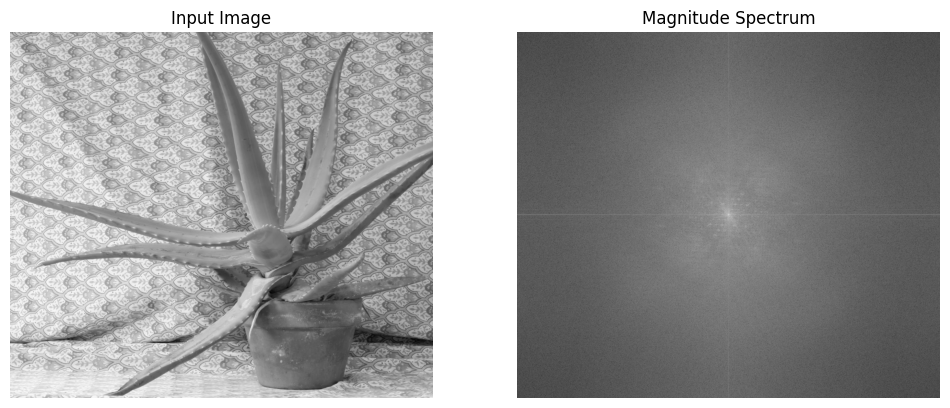

In [2]:
# Menerapkan Fourier Transform menggunakan FFT (Fast Fourier Transform)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f) # Geser komponen frekuensi nol ke pusat
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Input Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

## 2. Wavelet Transform
Wavelet Transform memberikan representasi multi-resolusi, memungkinkan analisis citra pada berbagai skala dengan membagi citra ke dalam komponen frekuensi dan temporal.

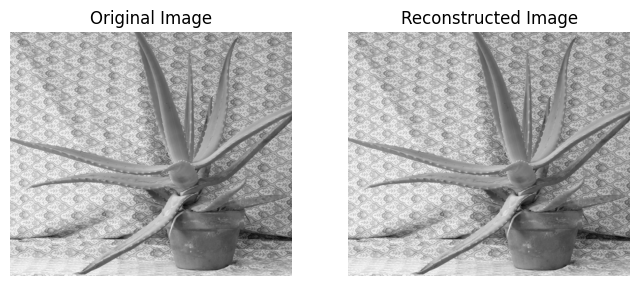

In [3]:
# Menggunakan PyWavelets untuk Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec2(image, 'haar', level=2)
reconstructed_image = pywt.waverec2(coeffs, 'haar')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(reconstructed_image, cmap='gray'), plt.title('Reconstructed Image'), plt.axis('off')
plt.show()